### We check if whether our data is Normaly distributed or not, if it's normally distributed then go for standardization, otherwise check for transformation

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab


In [1]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df.Age.fillna(df.Age.median(), inplace = True)

In [3]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

## We can use Q-Q plot to check whether our featur is Guassian or Normally Distributed or not

In [26]:
def plot_fun(data, featur):
    plt.figure(figsize = (17,7))
    plt.subplot(1,2,1)
    data[featur].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[featur], dist='norm', plot = pylab)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

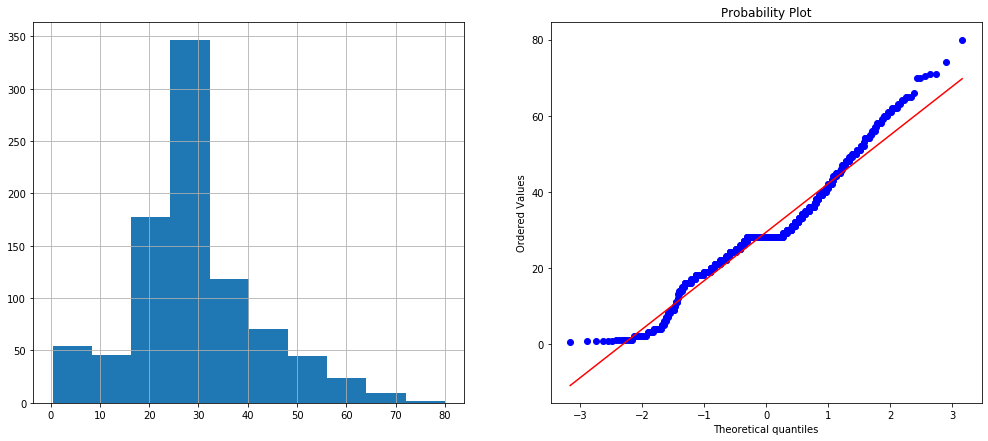

In [27]:
plot_fun(df, 'Age')

In [29]:
df.Age.mean()

29.36158249158249

## Apply Logarithmic Tranformation
- It'll work well if our data is rightly skewed or left skewed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

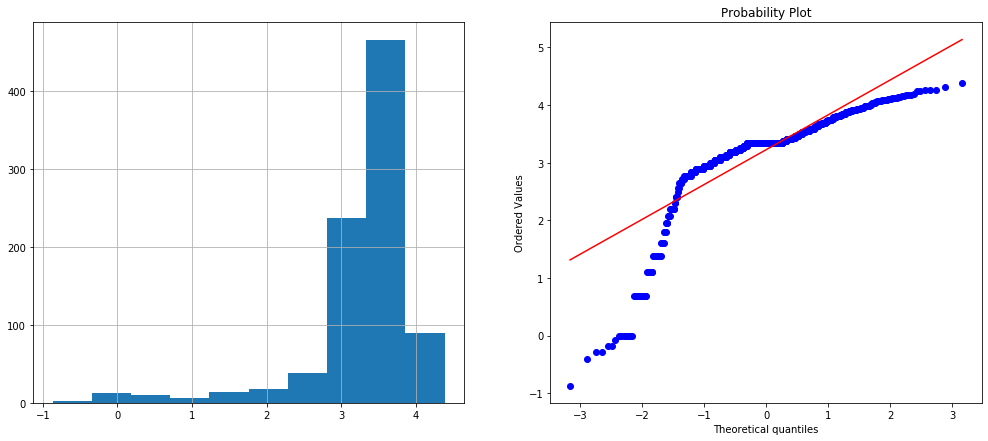

In [32]:
df['Age_log'] = np.log(df['Age'])
plot_fun(df, 'Age_log')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

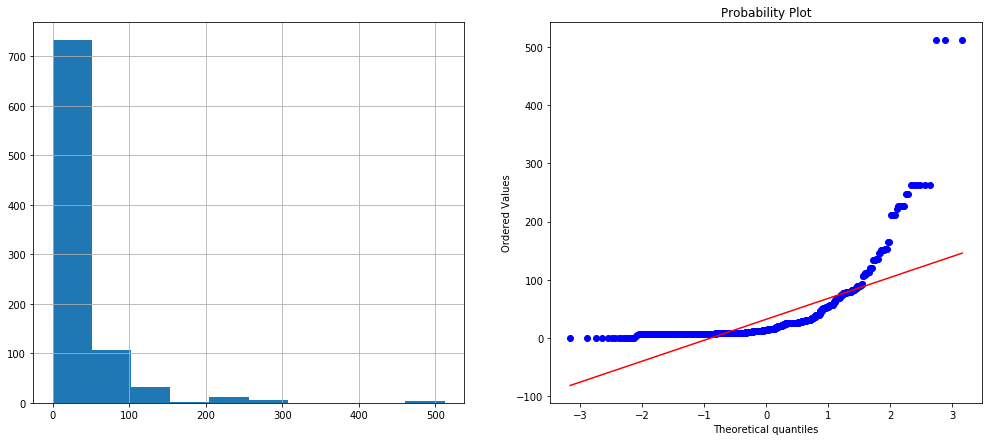

In [49]:
plot_fun(df, 'Fare')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

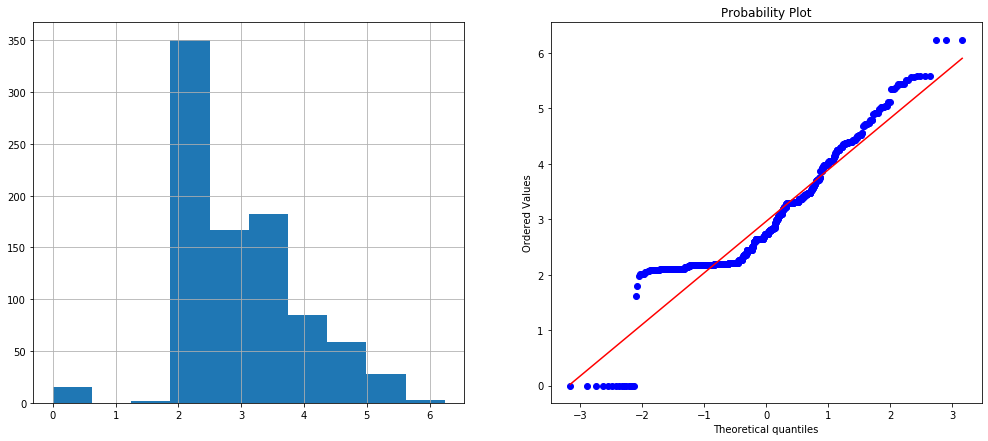

In [48]:
df['Fare_log'] = np.log1p(df['Fare'])
plot_fun(df, 'Fare_log')

## Reciprocal Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

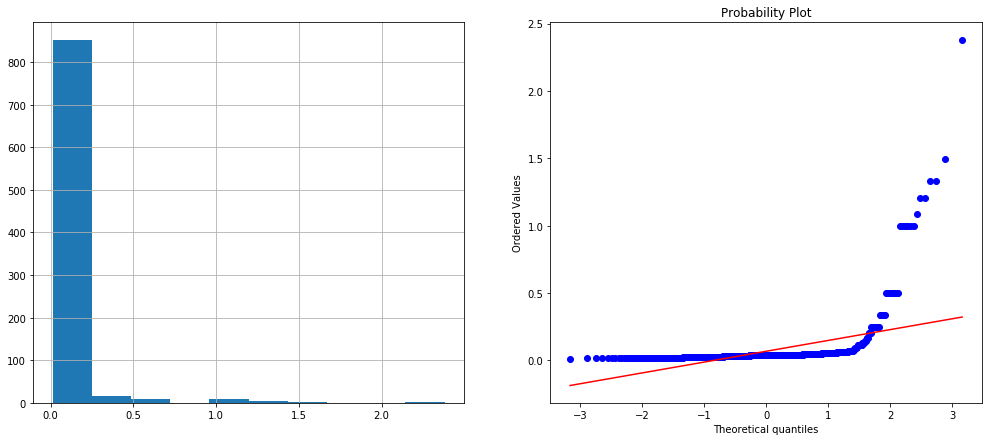

In [37]:
df['Age_reciprocal'] = 1/df['Age']
plot_fun(df, 'Age_reciprocal')

## Squareroot Transformation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

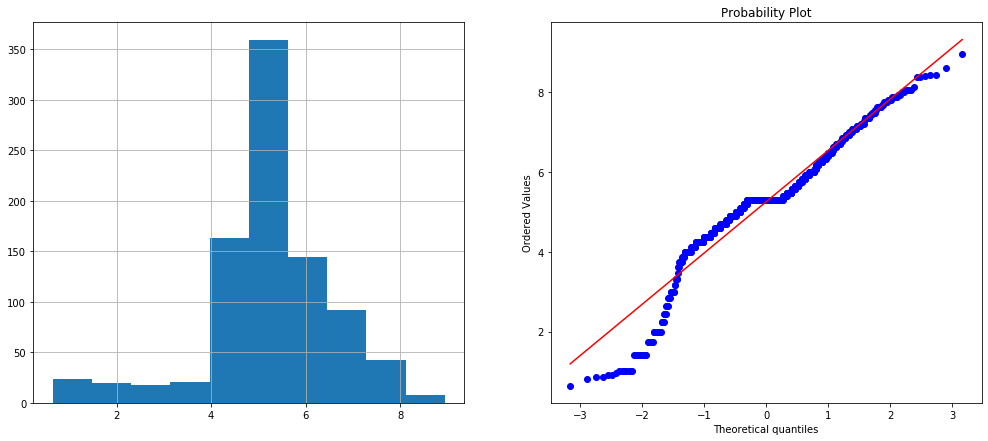

In [40]:
df['Age_sqroot'] = df['Age']**(1/2)
plot_fun(df, 'Age_sqroot')

## Exponential Transformation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

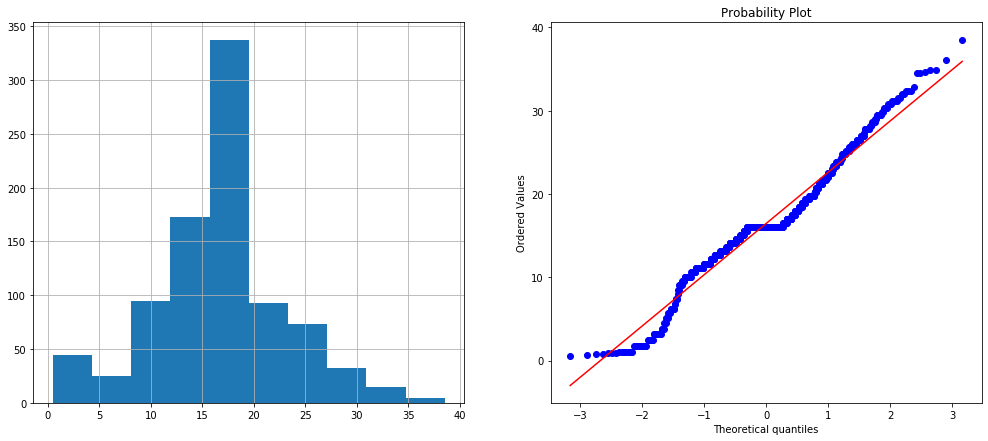

In [51]:
df['Age_exponential'] = df['Age']**(1/1.2)
# df['Age_exponential'] = (1/1.2)**df.Age
plot_fun(df, 'Age_exponential')

## Box Cox Transformation


In [45]:
df['Age_boxcox'], parameters = stats.boxcox(df['Age'])

In [46]:
print(parameters)

0.7964531473656952


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

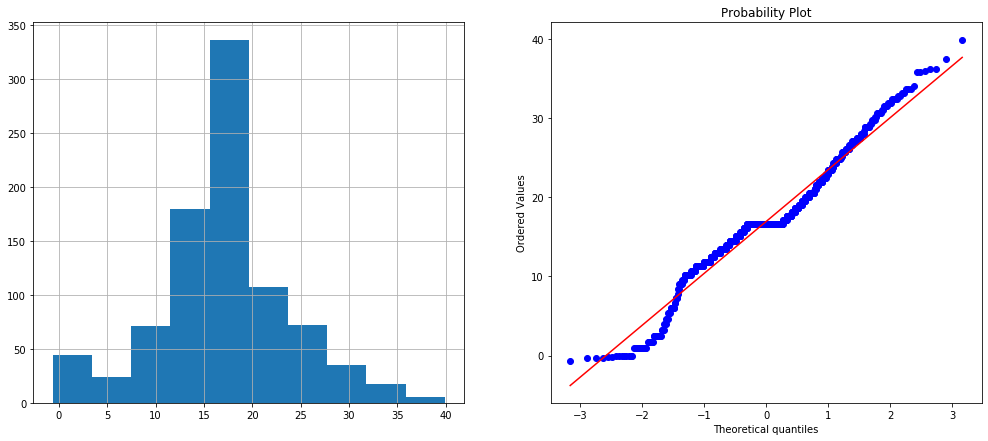

In [50]:
plot_fun(df, 'Age_boxcox')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

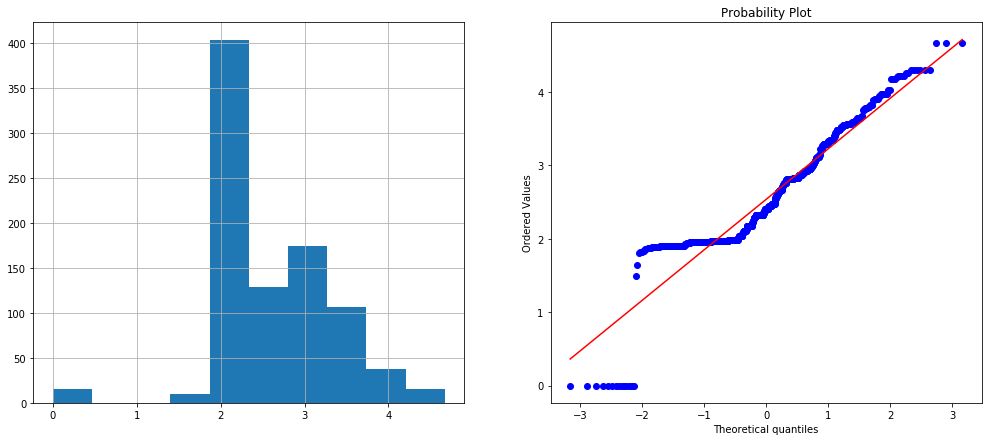

In [56]:
df['Fare_boxcox'], parameters = stats.boxcox(df['Fare']+1)
plot_fun(df, 'Fare_boxcox')